<a href="https://colab.research.google.com/github/kenneth-craig/academyPub/blob/main/ARIMA--armed-robbery-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install latest statsmodel library v0.13
!pip install -U statsmodels

In [2]:
# Easiest Way to get file uploaded to Google Colab environment
from google.colab import files
file = files.upload()

Saving robberies.csv to robberies.csv


# End To End ARIMA Sample Using Boston Armed Robery Dataset - Ch30
**Problem Description** - Ch 30.2

**Build Test Harness** - Ch 30.3

**Build Persistence Model for Comparison Purposes** - Ch30.4

**Data Analysis** - Ch 30.5

**ARIMA Model** - Ch 30.6

**Model Validation** - Ch 30.7



In [4]:
# Test Harness - Ch 30.3
import pandas as pd
series = pd.read_csv('robberies.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
print(series.describe())

# Use latest 1 year (12 months) of data for validation (oot) data being there is no up to date data
# Define split-point for oot data
split_point = len(series) - 12
dev_rob_ds, oot = series[0:split_point], series[split_point:]
dev_rob_ds.to_csv('dev_robbery.csv')
oot.to_csv('oot_robbery.csv')


count    118.000000
mean     196.288136
std      128.043602
min       29.000000
25%       85.500000
50%      166.000000
75%      296.750000
max      500.000000
Name: Robberies, dtype: float64


# Problem Description
- Predict the number of monthly armed robberies in Boston, USA
- The dataset provides the number of monthly armed robberies in Boston from January 1966 to October 1975 (nearly 10 years of data)
- There are 118 values and provide a count of armed robberies per month
- The problem will use Rolling Forecast type model

# Model Evaluation - Performance Measure & Test strategy
**Evaluation Method**
- Evaluate the performance of predictions using Root Mean Squared (RMSE) - This will give more weight to predictions that are grossly wrong and will have same unit as original data
- Any transformations to the data (e.g. box-cox) must be reversed before RMSE is calculated and calculated & reported to make the performance between different mothods directly comparable

**Test Strategy**
- The dataset is not current therefore 1 year of data will be held back for Validation testing
- Will be evaluated using walk-forward validation i.e. one-step forecasts are needed given all available data
- Walk forward validation will work as follows:

 - 50% of data will be held back for training the model
 - Remaining 50% of the dataset will be iterated and used to test the model
- For each step in the Test dataset:
 - A model will be trained
 - A one-step prediction made and the prediction stored for later evaluation
 - The actual observation from the test dataset will be added to the training dataset for the next iteration
- the redictions made during the iteration of the test dataset will be evaluated and RMSE score reported
- Given the small size of the dataset we will allow a model to be re-trained given all available data prior to each prediction


In [ ]:
# Evaluate Persitence Model for Armed Robberies
import pandas as pd
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load dataset
series = pd.read_csv('dev_robbery.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

# RMSE Performance Measure & Walk-Forward Validation will be used for Model Evaluation

# Prepare Data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

# Walk Forward validation
# Create History for Training data
history = [x for x in train]
# Predict result using Persistence Model
predictions = list()
for i in range(len(test)):
  # Predict
  yhat = history[-1]
  predictions.append(yhat)
  # Add observation to history
  obs = test[i]
  history.append(obs)
  print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# Report Performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)


# Data Analysis

1) Summary Statistics

2) Line Plot

3) Density Plot

4) Box & Whisker Plot comparing Annual Data Trends

5) Stationary Data test

6) ACF & PACF Auto-Correlation Plots

count    106.000000
mean     173.103774
std      112.231133
min       29.000000
25%       74.750000
50%      144.500000
75%      271.750000
max      487.000000
Name: Robberies, dtype: float64


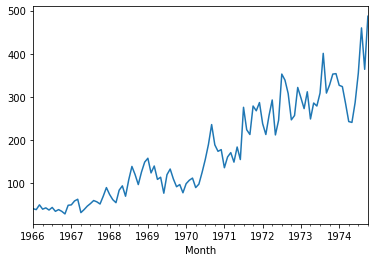

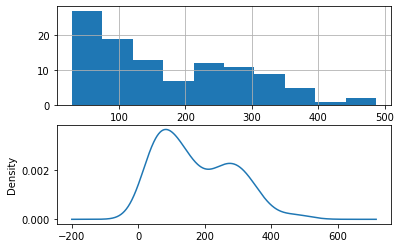

In [ ]:
# Perform Data Analysis
import pandas as pd
from matplotlib import pyplot
series = pd.read_csv('dev_robbery.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
print(series.describe())
# Observation: Large spread of data will likely make highly accurate predictions difficult if it is caused by random fluctuations (e.g. not systematic)

# Line plot
series.plot()
pyplot.show()
# Line plot observation:
# Increasing trend of robbereis over time
# No obvious outliers
# Large fluctuations up & down from year to year - later year fluctuations appear larger than earlier years
# The trend means the dataset is non-stationary 

pyplot.figure(1)
pyplot.subplot(211)
series.hist()
pyplot.subplot(212)
series.plot(kind='kde')
pyplot.show()
# Observations:
# Distribution is not Guassian
# Distribution is left shifted & may be exponential or double Gaussian
# May be benefit in exploring power transforms prior to modelling

Month
1966-01-01    41
1966-02-01    39
1966-03-01    50
1966-04-01    40
1966-05-01    43
Name: Robberies, dtype: int64
Month
1974-06-01    287
1974-07-01    355
1974-08-01    460
1974-09-01    364
1974-10-01    487
Name: Robberies, dtype: int64


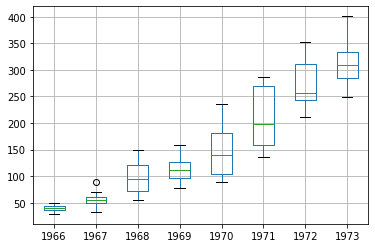

In [ ]:
# Box & Whisker Plot
# 
import pandas as pd
from matplotlib import pyplot
series = pd.read_csv('dev_robbery.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

print(series.head())
print(series.tail())

# Plot trend from 1966 to 1973, ignore 1974 as there is only 10 months of data
groups = series['1966':'1973'].groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()

for name, group in groups:
  years[name.year] = group.values

years.boxplot()
pyplot.show()
# Observations
# The median value for each year (green line) trend that may not be linear
# Spread (middle 50%) of data (blue box) differ i.e. no consistent over time
# 1st 2 years of data are quite difference from the rest of the dataset

# Conclusion:
# Observations suggest that year-to-year fluctuations may not be systematic and hard to model.
# May be some benefit in clipping 1st 2 years of data from modelling - if quite different

# Additional Analysis
# Could persue year-on-year summary statistics & changes in summary statistics from year to year

# ARIMA Model
- Stationary Data Test
- Augmented Dickey Fuller Test
- ACF & PACF Auto_Correlation Plots
- Manual Prediction
- Grid Search
- Review Residual Errors
- Box-Cox Log Transformed Dataset

**Stationary Data Test**

By Differencing Data & then Checking augmented Dickey-Fuller Stats test & determine the value for d (p, d, q)

In [5]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Create a differenced time series
def difference(dataset):
  diff = list()
  for i in range(1, len(dataset)):
    value = dataset[i] - dataset[i-1]
    diff.append(value)
  return pd.Series(diff)

series = pd.read_csv('dev_robbery.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
X = series.values

# Difference data
stationary = difference(X)
stationary.index = series.index[1:]

# Check if stationary
result = adfuller(stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))
# Save
stationary.to_csv('stastionary_robbery.csv')


ADF Statistic: -3.980946
p-value: 0.001514
Critical Values:
	1%: -3.503
	5%: -2.893
	10%: -2.584


**Auto-Correlation Plots - ACF & PACF**

Determine values for p & q by running ACF & PACF plots

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


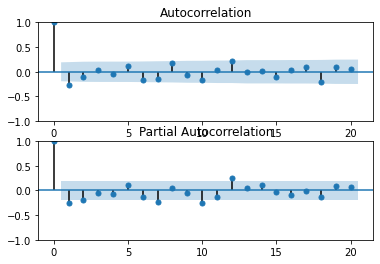

In [22]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

# load data
series = pd.read_csv('dev_robbery.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

pyplot.figure()
pyplot.subplot(211)
plot_acf(series, lags=20, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(series, lags=20, ax=pyplot.gca())
pyplot.show()


**ARIMA Model - Manual Prediction of Parameters**

In [ ]:
# ARIMA Model - Manual Prediction of Parameters
import pandas as pd
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt

# load data
series = pd.read_csv('dev_robbery.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

# prepare data
X = series.values
X = X.astype('float32')

train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
  # predict
  model = ARIMA(history, order=(0,1,2))
  model_fit = model.fit()
  yhat = model_fit.forecast()[0]
  predictions.append(yhat)
  # observation
  obs = test[i]
  history.append(obs)
  print('Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' %rmse)



**ARIMA Model - Grid Search Parameters**

In [ ]:
# ARIMA Model - Grid Search
import warnings
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# evaluate an ARIMA model for a given order (p, d, q) and return RMSE
def evaluate_arima_model(X, arima_order):
  # prepare training dataset
  X = X.astype('float32')
  train_size = int(len(X) * 0.50)
  train, test = X[0:train_size], X[train_size:]
  history = [x for x in train]
  # make predictions
  predictions = list()
  for t in range(len(test)):
    model = ARIMA(history, order=arima_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
  # calculate out of sample error
  rmse = sqrt(root_mean_squared_error(test, predictions))
  return rmse

# evaluate combination of p, d, q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
  best_score, best_cfg = float('inf'), None
  for p in p_values:
    for d in d_values:
      for q in q_values:
        order = (p,d,q)
        try:
          rmse = evaluate_arima_model(dataset, order)
          if rmse < best_score:
            best_score, best_cfg = rmse, order
          print('ARIMA%s, RMSE=%.3f' % (order, rmse))
        except:
          continue
  print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

# load_dataset
series = pd.read_csv('dev_robbery.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
p_values = range(0,13)
d_values = range(0, 4)
q_values = range(0, 13)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)


**Model Evaluation - Review Residual Error**

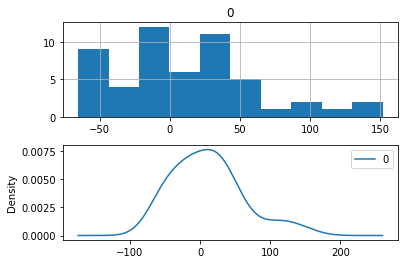

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


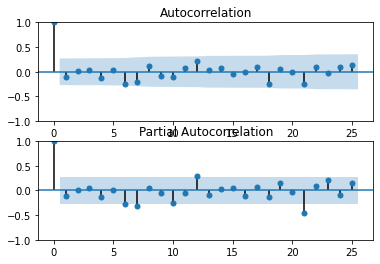

In [50]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

# load data
series = pd.read_csv('dev_robbery.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

# walk-forward validation
history = [x for x in train]
predictions = list()
residuals = list()
for i in range(len(test)):
  # predict
  model = ARIMA(history, order=(0,1,2))
  model_fit = model.fit()
  yhat = model_fit.forecast()[0]
  predictions.append(yhat)
  # observations
  obs = test[i]
  history.append(obs)
  # errors
  #residual = test[i] - predictions[i]
  #residuals.append(residual)

residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = pd.DataFrame(residuals)

# plots (density & history)
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())
pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

# Check residuals for Correlation
# plots (acf & pacf)
pyplot.figure()
pyplot.subplot(211)
plot_acf(residuals, lags=25, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(residuals, lags=25, ax=pyplot.gca())
pyplot.show()

**Box-Cox Transformed Dataset**

Box-Cox is a method able to evaluate a suite of power transforms (log, square root, reciprocal transform etc)

Lambda: 0.260060


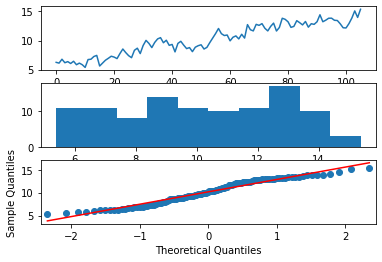

In [21]:
import pandas as pd
from scipy.stats import boxcox
from matplotlib import pyplot
from statsmodels.graphics.gofplots import qqplot

series = pd.read_csv('dev_robbery.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

# prepare data
X = series.values
# Log transform
transformed, lam = boxcox(X)
print('Lambda: %f' % lam)
# Line plot
pyplot.subplot(311)
pyplot.plot(transformed)
# Histogram
pyplot.subplot(312)
pyplot.hist(transformed)
# q-q plot
pyplot.subplot(313)
qqplot(transformed, line='r', ax=pyplot.gca())
pyplot.show()


**ARIMA Model with Box-Cox (Log) Transform Applied to Data**

In [ ]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import math as ml
from scipy.stats import boxcox

# inverse of box-cox (log) transform
def boxcox_inverse(value, lam):
  if lam == 0:
    return ml.exp(value)
  return ml.exp(ml.log(lam * value + 1) / lam)

# load data
series = pd.read_csv('dev_robbery.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

# prepare data
X = series.values
X = X.astype('float32')

train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
  # transform data
  transformed, lam = boxcox(history)
  if lam < -5:
    transformed, lam = history, 1
  # predict
  model = ARIMA(transformed, order=(0,1,2))
  model_fit = model.fit()
  yhat = model_fit.forecast()[0]
  # Invert transformed prediction
  yhat = boxcox_inverse(yhat, lam)
  predictions.append(yhat)
  # observation
  obs = test[i]
  history.append(obs)
  print('Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = ml.sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' %rmse)

# Conclusion: The new RMSE of the model on the transformed data is smaller error than 
# untransformed but only slightly, this may or may not be statistically significant.


# Model Validation
- Finalize Model
- Make Prediction using oot data
- Validate Model

**Finalize Model**

Train & save final model using entire (train & test) dataset

In [35]:
# Finalise model and save to file
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import boxcox
import numpy as np

# load data
series = pd.read_csv('dev_robbery.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

#prepare data
X = series.values
X = X.astype('float32')
# transform data
transformed, lam = boxcox(X)
# fit model
model = ARIMA(transformed, order=(0,1,2))
model_fit = model.fit()
# save model, saves ARIMAResult object
model_fit.save('model.pkl')
np.save('model_lambda.npy', [lam])


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


**Making Predictions**

Load the saved (finalised) model and make single forecast

In [49]:
# Load the model and make a prediction
from statsmodels.tsa.arima.model import ARIMAResults
import math as ml
import numpy as np

# invert box-cox transform
def boxcox_inverse(value, lam):
  if lam == 0:
    return ml.exp(value)
  return ml.exp(ml.log(lam * value + 1) / lam)

model_fit = ARIMAResults.load('model.pkl')
lam = np.load('model_lambda.npy')
yhat = model_fit.forecast()[0]
yhat = boxcox_inverse(yhat, lam)
print('Predicted: %.3f' % yhat)


Predicted: 452.365


**Validate Model**

Load & validate the final model

>Predicted=452.365, Expected=452.000
>Predicted:436.889, Expected=391.000
>Predicted:396.086, Expected=500.000


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


>Predicted:476.645, Expected=451.000
>Predicted:439.849, Expected=375.000
>Predicted:399.369, Expected=372.000
>Predicted:394.017, Expected=302.000
>Predicted:334.232, Expected=316.000
>Predicted:339.089, Expected=398.000
>Predicted:386.197, Expected=394.000
>Predicted:378.398, Expected=431.000
>Predicted:412.451, Expected=431.000
RMSE: 53.196


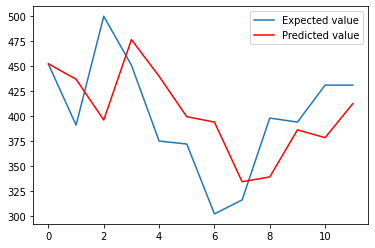

In [57]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMAResults
from sklearn.metrics import mean_squared_error
from scipy.stats import boxcox
import math as ml

# inverse of box-cox (log) transform
def boxcox_inverse(value, lam):
  if lam == 0:
    return ml.exp(value)
  return ml.exp(ml.log(lam * value + 1) / lam)

# load data
dev_series = pd.read_csv('dev_robbery.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
oot_series = pd.read_csv('oot_robbery.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
X = dev_series.values.astype('float32')
expected_y = oot_series.values.astype('float32')
# load model
model_fit = ARIMAResults.load('model.pkl')
lam = np.load('model_lambda.npy')
# make 1st prediction
predictions = list()
yhat = model_fit.forecast()[0]
# invert transformed prediction
yhat = boxcox_inverse(yhat, lam)
predictions.append(yhat)
history.append(expected_y[0])
print('>Predicted=%.3f, Expected=%.3f' % (yhat, expected_y[0]))
# rolling forecasts
for i in range(1, len(expected_y)):
  # transform
  transformed, lam = boxcox(history)
  if lam < -5:
    transformed, lam = history, 1
  # predict
  model = ARIMA(transformed, order=(0,1,2))
  model_fit = model.fit()
  yhat = model_fit.forecast()[0]
  # invert of the transformed prediction
  yhat = boxcox_inverse(yhat, lam)
  predictions.append(yhat)
  # observations
  obs = expected_y[i]
  history.append(obs)
  print('>Predicted:%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = ml.sqrt(mean_squared_error(expected_y, predictions))
print('RMSE: %.3f' % rmse)
pyplot.plot(expected_y, label='Expected value')
pyplot.plot(predictions, color='red', label='Predicted value')
pyplot.legend()
pyplot.show()
